# Figure 4: Spikes and calcium signaling reveal similar CEBRA embeddings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_hdf("../data/Figure4Revision.h5", key="data")

In [3]:
consistency = data["consistency"]
viz = data["visualization"]

dims = [3, 4, 8, 16, 32, 64, 128]
num_neurons = [10, 30, 50, 100, 200, 400, 600, 800, 900, 1000]

## Figure 4c,d,f,g

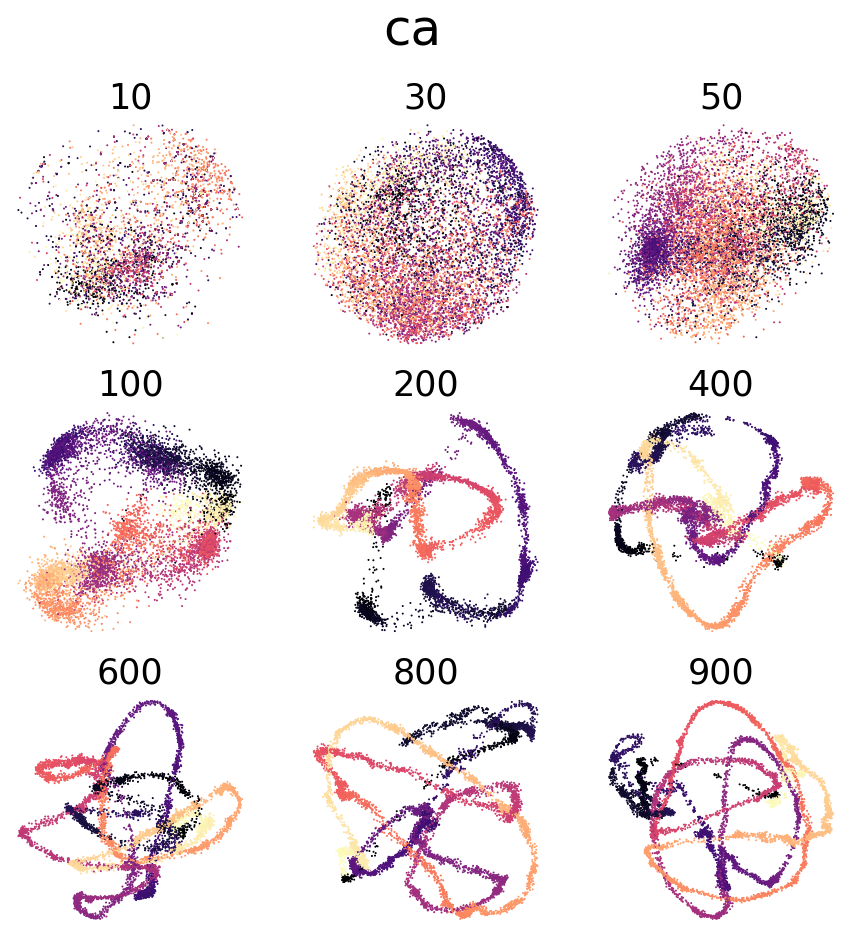

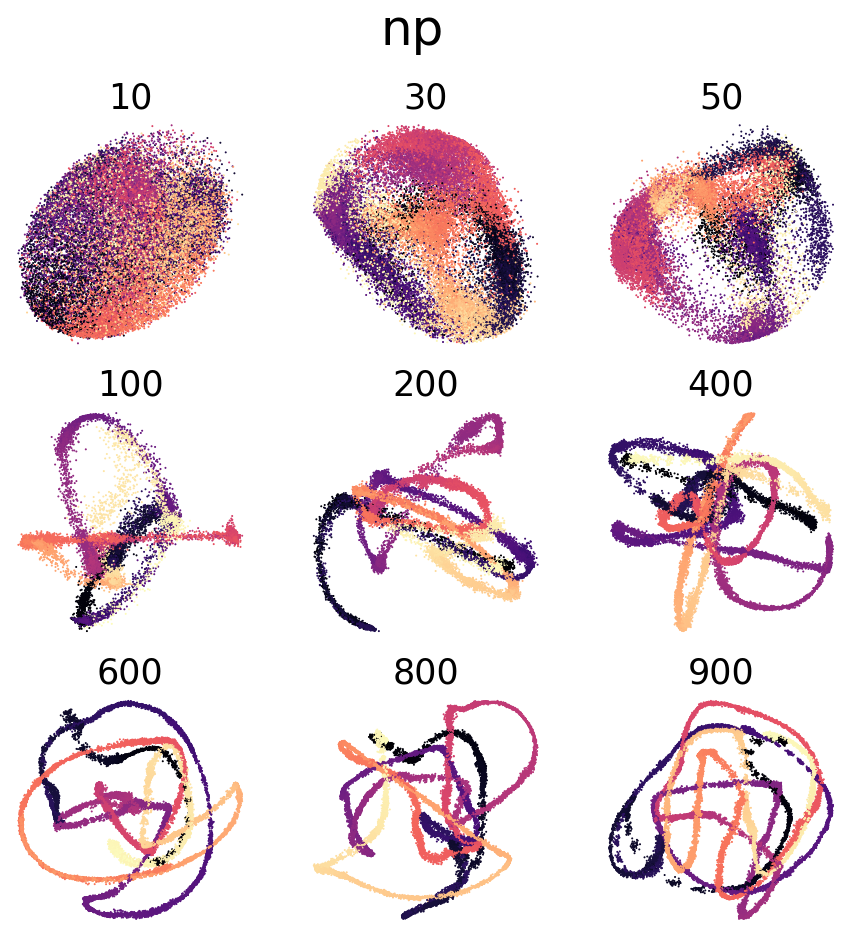

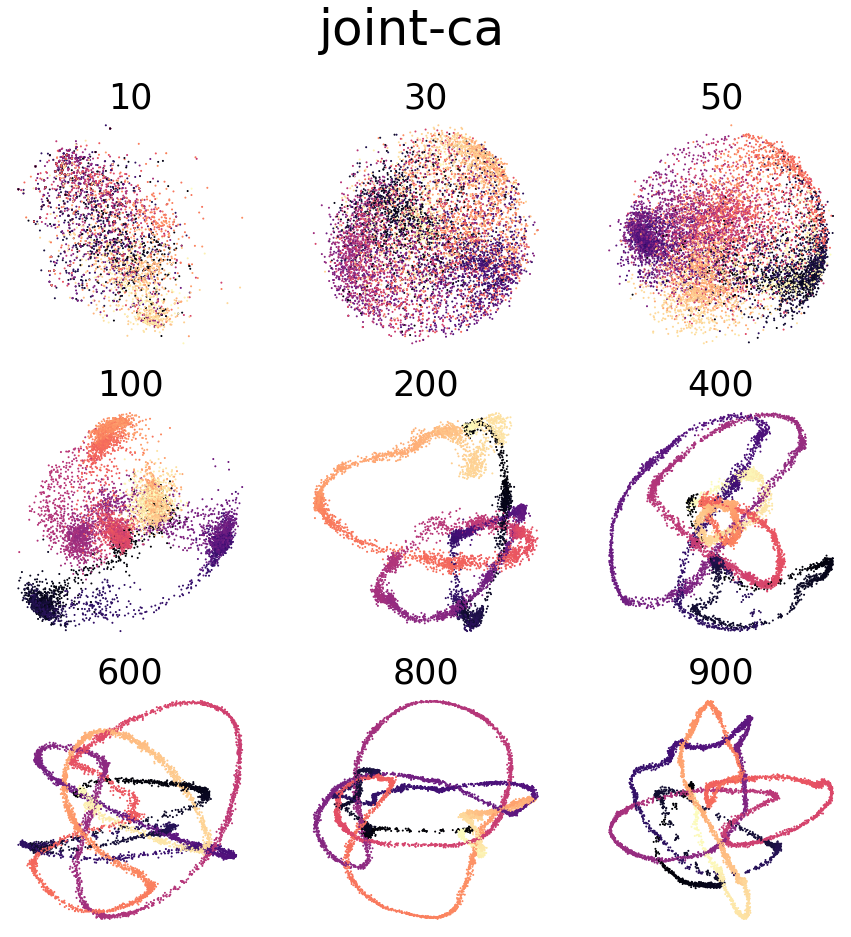

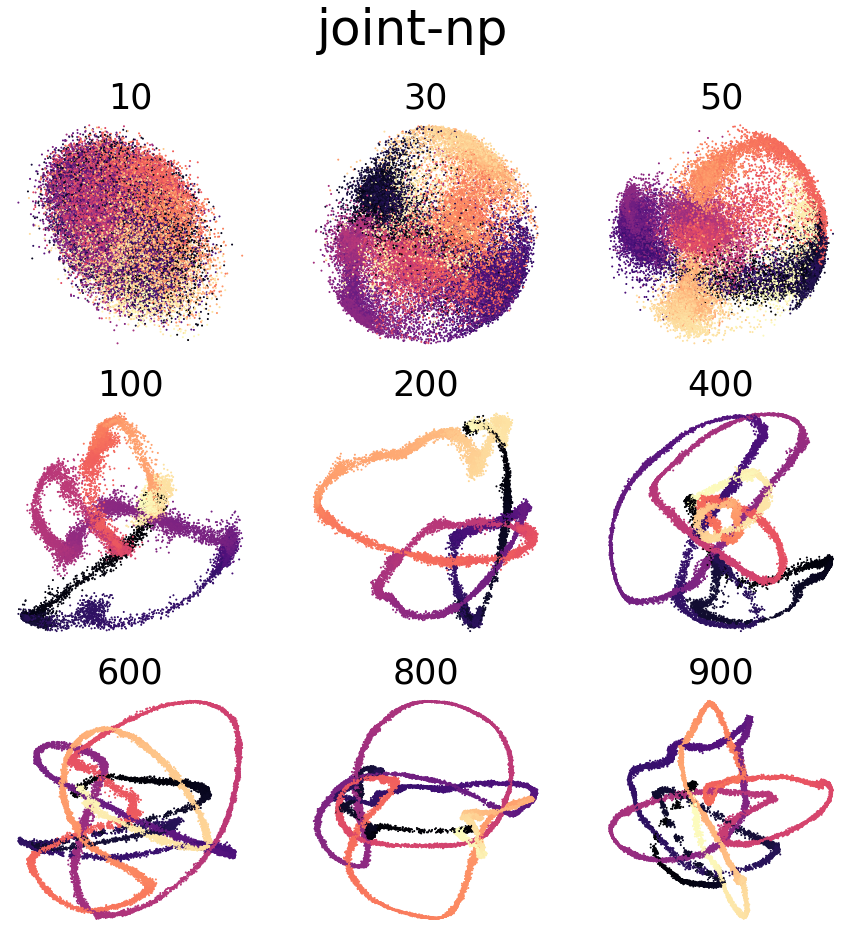

In [4]:
modality = ["ca", "np", "joint-ca", "joint-np"]

for m in modality:
    fig = plt.figure(figsize=(15, 15))
    plt.suptitle(f"{m}", fontsize=50)
    for i in range(9):
        ax = fig.add_subplot(3, 3, i + 1)
        if "np" in m:
            label = np.repeat(np.arange(900), 4)
        else:
            label = np.arange(900)
        ax.scatter(
            viz[m][num_neurons[i]][:, 0],
            viz[m][num_neurons[i]][:, 1],
            s=1,
            c=np.tile(label, 10),
            cmap="magma",
        )
        ax.set_title(f"{num_neurons[i]}", fontsize=35)
        plt.xticks([])
        plt.yticks([])
        plt.axis("off")

## Figure 4e+h

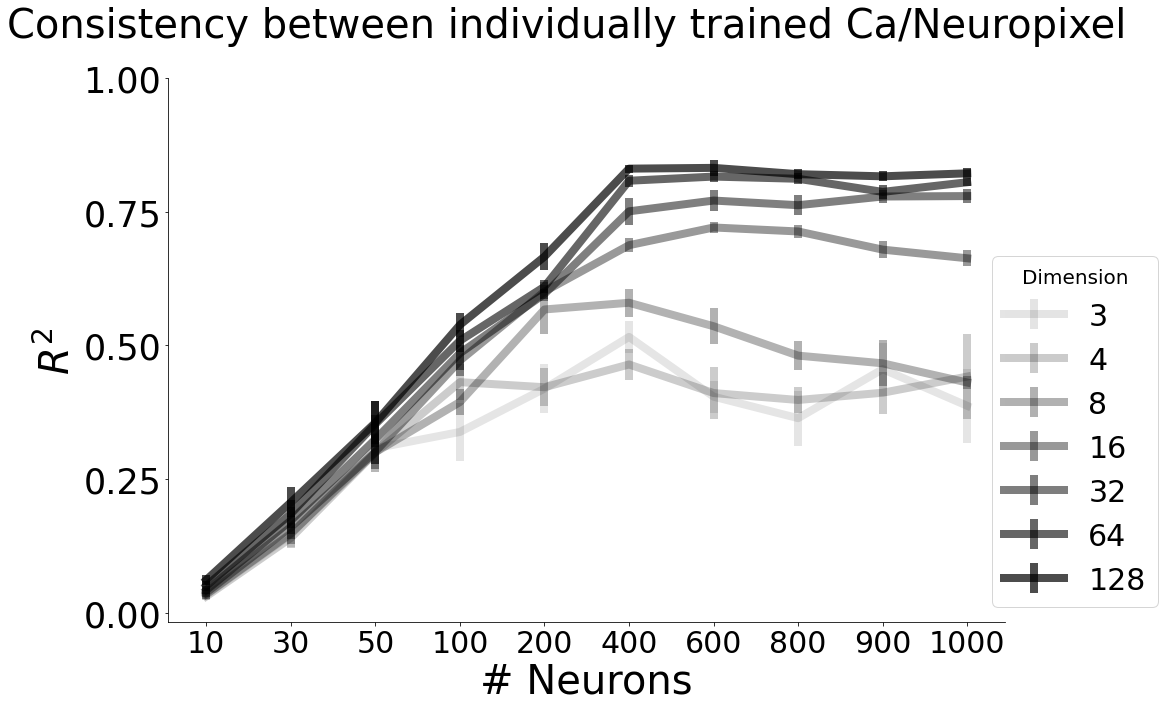

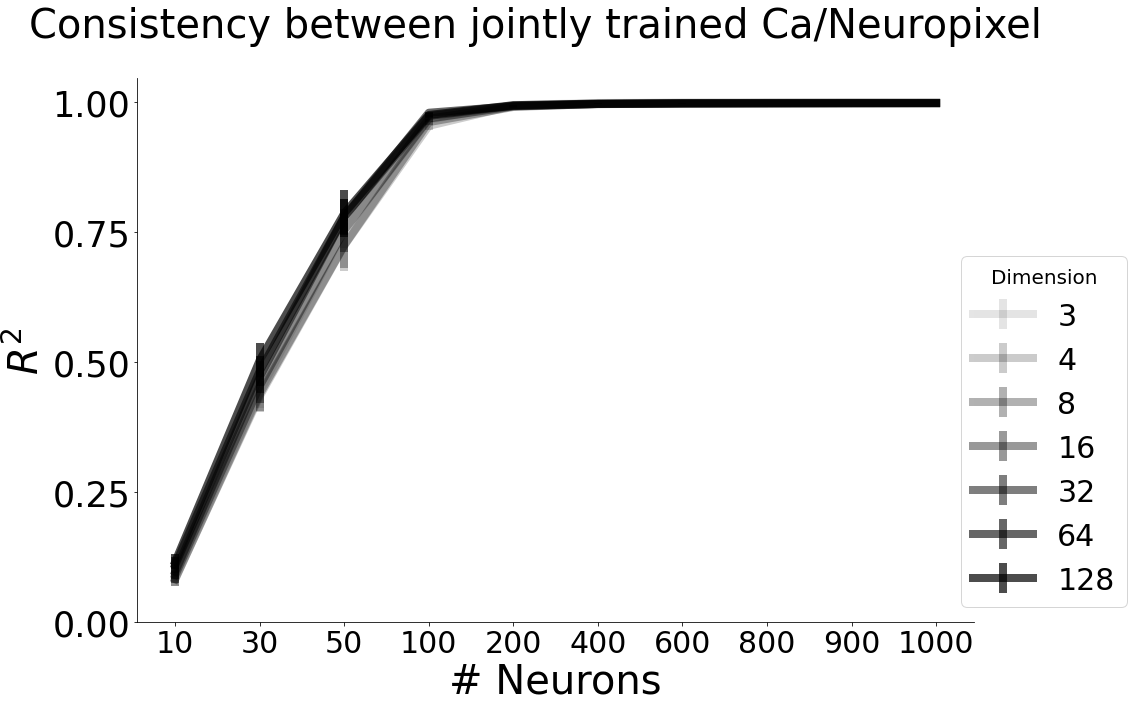

In [5]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(111)

for i, d in enumerate(dims):
    mean = consistency["individual"]["mean"][d]
    err = consistency["individual"]["err"][d]
    ax.errorbar(
        np.arange(10),
        mean,
        err,
        label=d,
        color="black",
        alpha=(i + 1) * 0.1,
        markersize=20,
        linewidth=8,
    )


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xticks(np.arange(10), [10, 30, 50, 100, 200, 400, 600, 800, 900, 1000], fontsize=30)
plt.yticks(np.linspace(0, 1.0, 5), fontsize=35)
plt.xlabel("# Neurons", fontsize=40)
plt.ylabel("$R^2$", fontsize=40)
plt.suptitle("Consistency between individually trained Ca/Neuropixel ", fontsize=40)
plt.legend(
    fontsize=30,
    loc="lower right",
    title="Dimension",
    title_fontsize=20,
    bbox_to_anchor=(1.2, 0),
)


plt.figure(figsize=(15, 10))
ax = plt.subplot(111)

dims = [3, 4, 8, 16, 32, 64, 128]

for i, d in enumerate(dims):
    mean = consistency["joint"]["mean"][d]
    err = consistency["joint"]["err"][d]
    ax.errorbar(
        np.arange(10),
        mean,
        err,
        label=d,
        color="black",
        alpha=(i + 1) * 0.1,
        markersize=20,
        linewidth=8,
    )


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xticks(np.arange(10), num_neurons, fontsize=30)
plt.yticks(np.linspace(0, 1.0, 5), fontsize=35)
plt.xlabel("# Neurons", fontsize=40)
plt.ylabel("$R^2$", fontsize=40)
plt.suptitle("Consistency between jointly trained Ca/Neuropixel ", fontsize=40)
plt.legend(
    fontsize=30,
    loc="lower right",
    title="Dimension",
    title_fontsize=20,
    bbox_to_anchor=(1.2, 0),
)

In [6]:
v1_color = "#9932EB"


def make_heatmap_from_df(df, title, vmax, vmin, white=False):
    upper = df.mask(np.triu(np.ones((6, 6)), 1).astype(bool))
    lower = df.mask(np.tril(np.ones((6, 6)), -1).astype(bool))
    tri_mean = pd.concat([upper, lower.T]).groupby(level=0).mean()
    df = tri_mean.reindex(
        index=["VISal", "VISrl", "VISl", "VISp", "VISam", "VISpm"],
        columns=["VISal", "VISrl", "VISl", "VISp", "VISam", "VISpm"],
    )
    fig = plt.figure(figsize=(4, 3))
    # plt.title(title)

    mask = np.triu(np.ones((6, 6)), 1)
    p = sns.heatmap(
        df,
        annot=True,
        vmin=vmin,
        vmax=vmax,
        cmap="gray_r",
        mask=mask,
        annot_kws={"size": 12},
        cbar_kws=dict(ticks=np.arange(vmin, vmax + 5, 5)),
    )
    if white:
        _c = "white"
    else:
        _c = "k"
    plt.yticks(rotation=0, color=_c)
    plt.xticks(color=_c)
    for a in p.axes.get_yticklines():
        a.set_color(_c)
    for a in p.axes.get_xticklines():
        a.set_color(_c)
    cbar = p.figure.axes[-1]
    cbar.yaxis.label.set_color(_c)
    cbar.tick_params(color=_c, labelcolor=_c)
    plt.show()


def make_line_strip_from_df(df, title, vmin, vmax, white=False):

    if white:
        _c = "white"
    else:
        _c = "k"

    def make_comparison(df, area):
        areas = df["area_type"].unique()
        inter_area = areas[[(area in a) and ("-" in a) for a in areas]]
        intra_median = df[(df["area_type"] == area) & (df["type"] == "intra")].mean()
        non_related_inter_median = df[
            (df["area_type"] == inter_area[0]) | (df["area_type"] == inter_area[1])
        ].mean()
        related_inter_median = df[
            (df["area_type"] == area) & (df["type"] == "inter")
        ].mean()
        return intra_median, related_inter_median, non_related_inter_median

    area_type = df["area"]
    intra = df["intra"]
    inter = df["inter"]
    pair_type = ["intra"] * len(intra) + ["inter"] * len(inter)
    group = ["else" if "-" in a else a for a in area_type]
    color = [
        v1_color if (p == "intra" and c == "primary") else "gray"
        for p, c in zip(pair_type, area_type)
    ]
    fig = plt.figure(figsize=(3, 3))
    sns.set_style("ticks")

    # Set your custom color palette
    # sns.set_palette(sns.color_palette(COLORS))
    ax = plt.subplot(111)

    ax.set_yticks(np.linspace(0, 100, 11))
    plt.ylim(vmin, vmax)
    plt.xlim(-1, 2)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["intra", "inter"], color=_c)
    ax.tick_params(axis="both", which="major", labelsize=15)
    sns.despine(
        left=False, right=True, bottom=False, top=True, trim=True, offset={"bottom": 20}
    )
    d = pd.DataFrame(
        {
            "value": np.concatenate([intra.value, inter.value]),
            "color": color,
            "group": group,
            "type": ["intra"] * len(intra) + ["inter"] * len(inter),
            "area_type": area_type,
            "area1": np.concatenate([intra.Area1, inter.Area1]),
            "area2": np.concatenate([intra.Area2, inter.Area2]),
        }
    )
    d = d.sort_values("color", ascending=False)
    d = d.sort_values("type", ascending=False)
    plot = sns.stripplot(
        x="type",
        y="value",
        data=d,
        ax=ax,
        s=3,
        zorder=0,
        hue="color",
        palette={"gray": "gray", v1_color: v1_color},
    )

    plt.ylabel("$R^2$", fontsize=20, color=_c)
    ax.spines["left"].set_color(_c)
    ax.spines["bottom"].set_color(_c)
    intra_median, related_inter_median, non_related_inter_median = make_comparison(
        d, "primary"
    )
    ax.plot([intra_median, non_related_inter_median], marker="o", color=v1_color)
    plt.legend([], [], frameon=False)
    for a in plot.axes.get_yticklines():
        a.set_color(_c)
    for a in plot.axes.get_xticklines():
        a.set_color(_c)

    plt.yticks(color=_c)
    plt.xticks(color=_c)

    plt.show()

## Figure TODO

TODO(update once fixed)

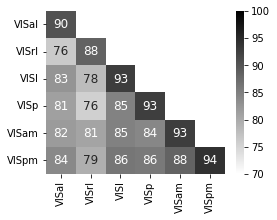

In [7]:
make_heatmap_from_df(
    pd.DataFrame(data["cortices_consistency"]["joint_cortices"]),
    "Joint Ca-Joint NP",
    100,
    70,
)

## Figure TODO

TODO(update once fixed)

/tmp/ipykernel_1294662/3790038935.py:52: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  intra_median = df[(df["area_type"] == area) & (df["type"] == "intra")].mean()
/tmp/ipykernel_1294662/3790038935.py:53: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  non_related_inter_median = df[


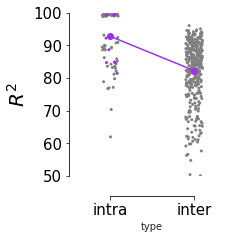

In [8]:
make_line_strip_from_df(
    data["cortices_consistency"]["joint_v1"], "V1 inter-intra", 50, 100
)